# Titanic - Machine Learning from Disaster (Kaggle)
https://www.kaggle.com/c/titanic/overview

In this project I build several classification models to predict whether a passenger on the Titanic survived or not. I begin with some exploratory data analysis and then build a Logistic Regression, Decision Tree and then a Random Forest using GridSearchCV to find the optimal hyperparameters to use within the model. I then export my predictions from the best model on the test set (for which the true values are unknown) and upload them to Kaggle to get my accuracy score and ranking. 

The best model was the Random Forest classifier, which resulted in an accuracy score of 77.8% (on the test set) and a ranking within the top 32%. 

In [156]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import train_test_split

In [173]:
#read in the data
train_path = r'./Data/train.csv'
test_path = r'./Data/test.csv'

In [174]:
train = pd.read_csv(train_path)
test = pd.read_csv(test_path)

In [175]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [176]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [177]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [178]:
train.shape

(891, 12)

In [179]:
test.shape

(418, 11)

In [180]:
train[train.Age.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [181]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


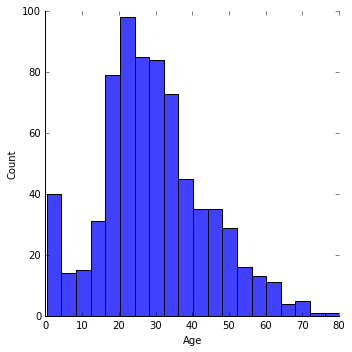

In [182]:
sns.displot(train.Age)

In [183]:
#impute missing ages with the mean 
train['Age'].fillna(train['Age'].mean(), inplace = True)

In [184]:
#drop Cabin since there are 687 missing values from 891 rows - not enough information to impute with 
train.drop(columns = 'Cabin', inplace=True)

In [185]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [186]:
train = train[train['Embarked'].notnull()]

In [187]:
train.shape

(889, 11)

In [191]:
#one hot encode Sex
gender_dummies = pd.get_dummies(train.Sex, prefix = 'gender', drop_first=True)
gender_dummies_test = pd.get_dummies(test.Sex, prefix = 'gender', drop_first=True)

train_2 = pd.concat([train, gender_dummies], axis =1)
test_2 = pd.concat([test, gender_dummies_test], axis =1)

In [193]:
test_2.shape

(418, 12)

In [194]:
#one hot encode embarked
embarked_dummies = pd.get_dummies(train.Embarked, prefix = 'embarked', drop_first=True)
embarked_dummies_test = pd.get_dummies(test.Embarked, prefix = 'embarked', drop_first=True)

train_2 = pd.concat([train_2, embarked_dummies], axis =1)
test_2 = pd.concat([test_2, embarked_dummies_test], axis =1)

<AxesSubplot:>

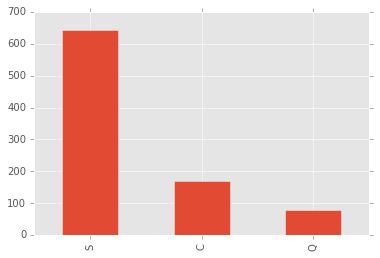

In [195]:
plt.style.use('ggplot')
train['Embarked'].value_counts().plot(kind = 'bar')

<AxesSubplot:>

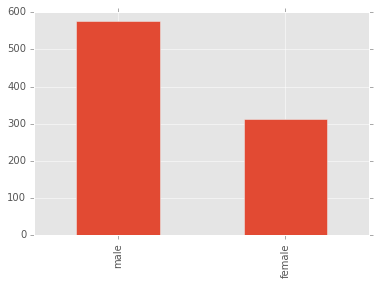

In [196]:

train['Sex'].value_counts().plot(kind = 'bar')

Text(0.5, 1.0, 'Distribution of ticket prices')

<Figure size 288x288 with 0 Axes>

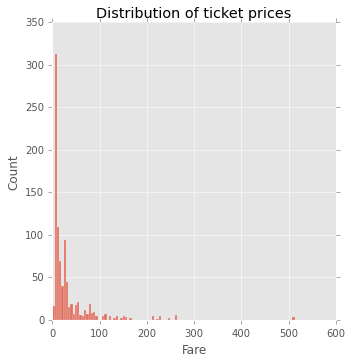

In [197]:
plt.figure(figsize=(4,4))

sns.displot(train['Fare'])
plt.title('Distribution of ticket prices')

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

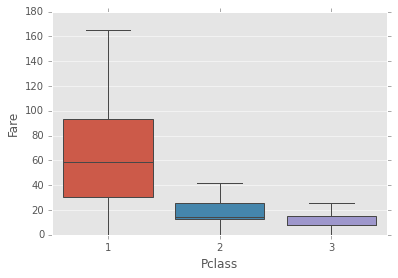

In [198]:
sns.boxplot(y=train['Fare'], x=train['Pclass'], showfliers=False)

In [199]:
train_2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,gender_male,embarked_Q,embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


### Building a Logistic Regression

In [269]:
feature_cols = ['Age', 'SibSp', 'Parch', 'Fare', 'Pclass', 'gender_male', 'embarked_Q', 'embarked_S']
X_train = train_2[feature_cols]
y_train = train_2['Survived']

X_test = test_2[feature_cols]

In [270]:
## split Train set into a Train and Validation set 
#create train and test splits
X_train_t, X_train_val, y_train_t, y_train_val = train_test_split(X_train, y_train, test_size=0.3, random_state = 99)

In [271]:
print(y_train_val.shape)
print(y_train_t.shape)

(267,)
(622,)


In [203]:
from sklearn.linear_model import LogisticRegression

In [204]:
lr = LogisticRegression()

In [205]:
lr.fit(X_train_t, y_train_t)

C:\Users\hmalek\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [206]:
y_pred_train = lr.predict(X_train_t)
y_pred_val = lr.predict(X_train_val)

In [207]:
score_train = lr.score(X_train_t, y_train_t)
print(score)
score_val = lr.score(X_train_val, y_train_val)
print(score_val)

0.8536977491961415
0.7415730337078652


In [208]:
from sklearn.metrics import accuracy_score
y_train.value_counts()

0    549
1    340
Name: Survived, dtype: int64

In [209]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
confusion_matrix(y_true=y_train_t, y_pred=lr.predict(X_train_t))

array([[338,  48],
       [ 64, 172]], dtype=int64)

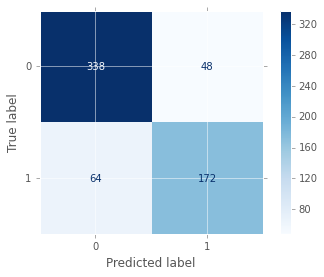

In [210]:
plot_confusion_matrix(lr, X_train_t, y_train_t, cmap='Blues')

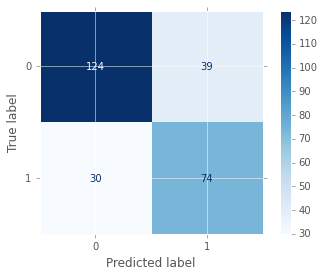

In [211]:
plot_confusion_matrix(lr, X_train_val, y_train_val, cmap='Blues')

In [212]:
print("ROC AUC Score Train set: {}".format(metrics.roc_auc_score(y_train_t,y_pred_train)))
print("ROC AUC Score Validation set: {}".format(metrics.roc_auc_score(y_train_val,y_pred_val)))

ROC AUC Score Train set: 0.8022306138579081
ROC AUC Score Validation set: 0.7361373289287401


In [213]:
print("Accuracy Score Train set: {}".format(metrics.accuracy_score(y_train_t,y_pred_train)))
print("Accuracy Score Validation set: {}".format(metrics.accuracy_score(y_train_val,y_pred_val)))

Accuracy Score Train set: 0.819935691318328
Accuracy Score Validation set: 0.7415730337078652


The model results in an accuracy of 74% on the validation set, however seems to be overfit on the training data. We can see the coefficients of the model below to understand the model further. 

In [214]:
name = X_train_t.columns

coef = lr.coef_[0]

pd.DataFrame([name,coef],index = ['Name','Coef']).transpose()

,Name,Coef
0,Age,-0.0510672
1,SibSp,-0.42273
2,Parch,-0.021247
3,Fare,0.00136192
4,Pclass,-1.10233
5,gender_male,-2.80794
6,embarked_Q,0.0654948
7,embarked_S,-0.244212


### Building a Decision Tree Classifier

In [215]:
# Fit a classification tree with max_depth=3 on all data.
from sklearn.tree import DecisionTreeClassifier

treeclf = DecisionTreeClassifier(max_depth=3, random_state=1)
treeclf.fit(X_train_t, y_train_t)

DecisionTreeClassifier(max_depth=3, random_state=1)

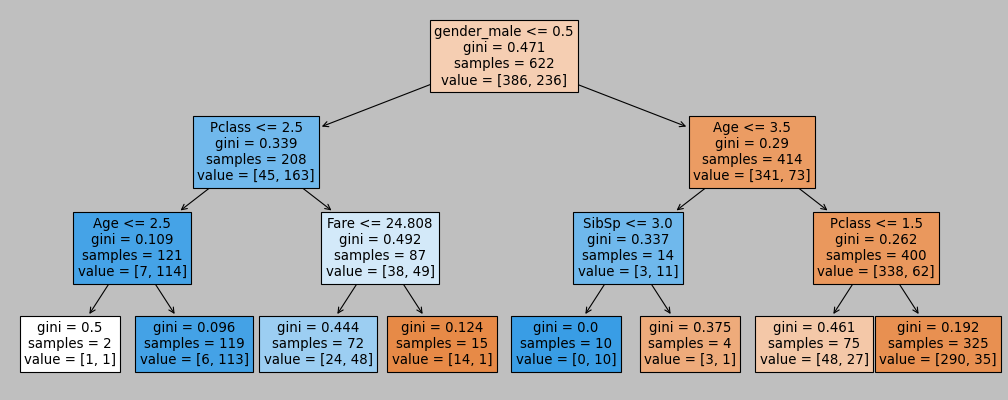

In [216]:
#plot the Decision Tree 
plt.style.use('classic')
from sklearn.tree import plot_tree

fig, ax = plt.subplots(1,1, figsize=(16,6)) 
plot_tree(treeclf, feature_names=feature_cols, fontsize=12, filled=True);

<AxesSubplot:xlabel='feature'>

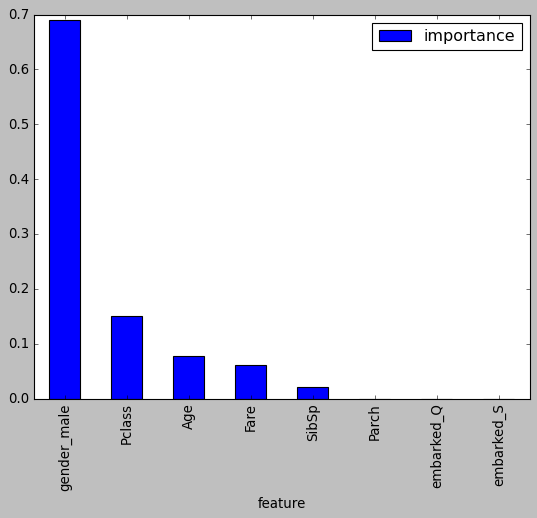

In [217]:
#Plot feature importances
feature_importance = pd.DataFrame({'feature':feature_cols, 'importance':treeclf.feature_importances_})
feature_importance.sort_values(by='importance', ascending = False).plot(x='feature', y = 'importance', kind='bar')

In [218]:
#get accuracy score of Decision Tree Classifier
y_pred_train = treeclf.predict(X_train_t)
y_pred_val = treeclf.predict(X_train_val)
score = treeclf.score(X_train_t, y_train_t)
print(score)

score_val = treeclf.score(X_train_val, y_train_val)
print(score_val)

0.8472668810289389
0.7565543071161048


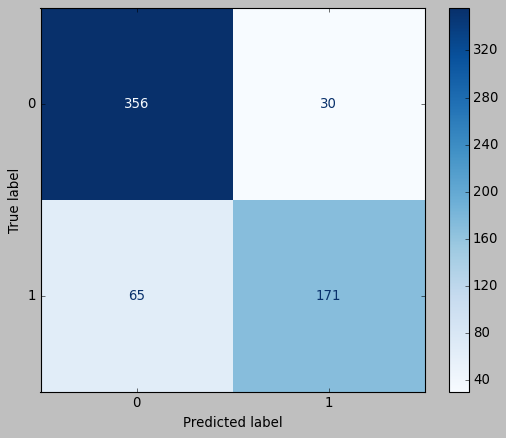

In [219]:
plot_confusion_matrix(treeclf, X_train_t, y_train_t, cmap='Blues')

In [220]:
print("ROC AUC Score Train set: {}".format(metrics.roc_auc_score(y_train_t,y_pred_train)))
print("ROC AUC Score Validation set: {}".format(metrics.roc_auc_score(y_train_val,y_pred_val)))
print("Accuracy Score Train set: {}".format(metrics.accuracy_score(y_train_t,y_pred_train)))
print("Accuracy Score Validation set: {}".format(metrics.accuracy_score(y_train_val,y_pred_val)))

ROC AUC Score Train set: 0.8234280319662773
ROC AUC Score Validation set: 0.7397062293534685
Accuracy Score Train set: 0.8472668810289389
Accuracy Score Validation set: 0.7565543071161048


The Decision Tree model still seems to be overfit to the training data however our validation scores are slightly better than the Logistic Regression model. This model resulted in an accuracy score of 76% on the validation data

### Building a Random Forest Classifier

Firstly I'll build a Random Forest Classifier without any tuning to see what the model results in. I'll then tune the model to try and improve the accuracy further. 

In [221]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100, random_state=1)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train_t,y_train_t)

#y_pred=clf.predict(X_test)
y_pred_train = clf.predict(X_train_t)
y_pred_val = clf.predict(X_train_val)

In [222]:
print("ROC AUC Score Train set: {}".format(metrics.roc_auc_score(y_train_t,y_pred_train)))
print("ROC AUC Score Validation set: {}".format(metrics.roc_auc_score(y_train_val,y_pred_val)))
print("Accuracy Score Train set: {}".format(metrics.accuracy_score(y_train_t,y_pred_train)))
print("Accuracy Score Validation set: {}".format(metrics.accuracy_score(y_train_val,y_pred_val)))

ROC AUC Score Train set: 0.9855207692983226
ROC AUC Score Validation set: 0.7510618216139688
Accuracy Score Train set: 0.9871382636655949
Accuracy Score Validation set: 0.7640449438202247


This model resulted in an accuracy of 76.4%, which is higher than all previous models. I can take a look at feature importances and then try to tune the model to improve this score further.

No handles with labels found to put in legend.


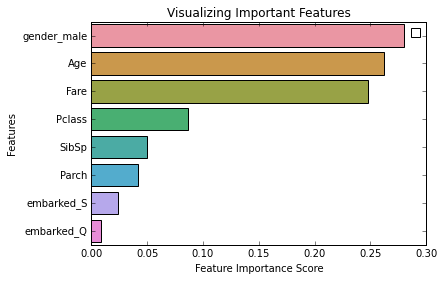

In [224]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

feature_imp = pd.Series(clf.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp


# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

<AxesSubplot:xlabel='feature'>

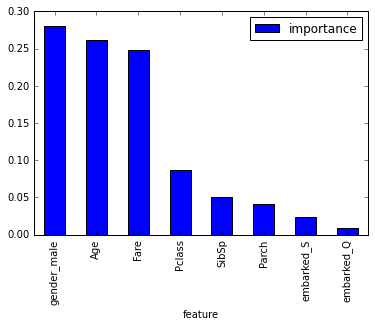

In [225]:
#alternative feature importance chart
feature_importance = pd.DataFrame({'feature':feature_cols, 'importance':clf.feature_importances_})
feature_importance.sort_values(by='importance', ascending = False).plot(x='feature', y = 'importance', kind='bar')

Let's try and improve this Random Forest model by tuning the hyperparameters in search of the model resulting in the best accuracy score. I'll use GridSearchCV to do this as it allows you to tune all hyperparameters at once, in combination with one another, rather than choosing one at a time. This will also help reduce overfitting as we have seen in our current Random Forest model as the Validation set Accuracy is a lot lower than the Train set Accuracy. 

In [258]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(random_state=1)

n_estimators = [1000]
max_features = [3,4,5,6]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [3,5, 8, 10] 

hyperF = dict(n_estimators = n_estimators, max_features = max_features,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(rf, hyperF, cv = 5, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(X_train_t, y_train_t)


Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   49.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  6.6min finished


In [259]:
# take a look at the best parameters used in the model 
gridF.best_estimator_

RandomForestClassifier(max_features=4, min_samples_leaf=3, n_estimators=1000,
                       random_state=1)

In [260]:
gridF.best_score_

0.8553290322580646

In [261]:
#build predictions using tuned Random Forest model 
y_pred_train = gridF.predict(X_train_t)
y_pred_val = gridF.predict(X_train_val)

In [262]:
print("ROC AUC Score Train set: {}".format(metrics.roc_auc_score(y_train_t,y_pred_train)))
print("ROC AUC Score Validation set: {}".format(metrics.roc_auc_score(y_train_val,y_pred_val)))
print("Accuracy Score Train set: {}".format(metrics.accuracy_score(y_train_t,y_pred_train)))
print("Accuracy Score Validation set: {}".format(metrics.accuracy_score(y_train_val,y_pred_val)))

ROC AUC Score Train set: 0.8901708088170721
ROC AUC Score Validation set: 0.7650719679093911
Accuracy Score Train set: 0.9035369774919614
Accuracy Score Validation set: 0.7790262172284644


Our accuracy has improved to 77.9%, which is the best we have gotten so far

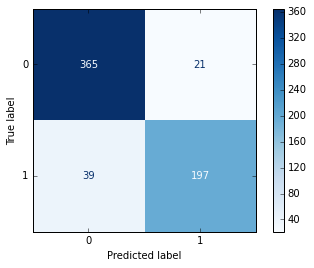

In [263]:
plot_confusion_matrix(gridF, X_train_t, y_train_t, cmap='Blues')

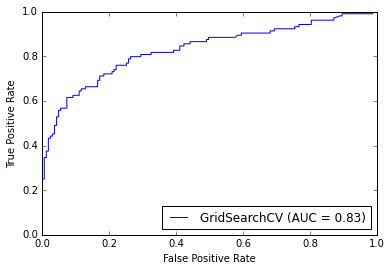

In [265]:
metrics.plot_roc_curve(gridF, X_train_val, y_train_val)  

In [272]:
X_test.isnull().sum()

Age            86
SibSp           0
Parch           0
Fare            1
Pclass          0
gender_male     0
embarked_Q      0
embarked_S      0
dtype: int64

In [273]:
X_test.shape

(418, 8)

In [274]:
#impute missing values with mean 
X_test['Age'].fillna(X_test['Age'].mean(), inplace = True)

C:\Users\hmalek\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\series.py:4523: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [275]:
X_test['Fare'].fillna(X_test['Fare'].mean(), inplace = True)

In [276]:
X_test.isnull().sum()

Age            0
SibSp          0
Parch          0
Fare           0
Pclass         0
gender_male    0
embarked_Q     0
embarked_S     0
dtype: int64

In [277]:
#get predictions on test set 
predictions = gridF.predict(X_test)

In [278]:
X_test['Survived'] = predictions

X_test.shape

C:\Users\hmalek\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


(418, 9)

In [279]:
test.shape

(418, 11)

In [280]:
#add predictions column back on original test dataset 
test_predictions = pd.concat([test, X_test], axis =1)
test_predictions.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age,SibSp,Parch,Fare,Pclass,gender_male,embarked_Q,embarked_S,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,34.5,0,0,7.8292,3,1,1,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,47.0,1,0,7.0000,3,0,0,1,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,62.0,0,0,9.6875,2,1,1,0,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,27.0,0,0,8.6625,3,1,0,1,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,22.0,1,1,12.2875,3,0,0,1,1


In [281]:
#take only our columns which need to be submitted 
submission = test_predictions[['PassengerId', 'Survived']]

In [282]:
submission.shape

(418, 2)

In [283]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [284]:
#write as csv to upload to Kaggle
submission.to_csv('submission_titanic.csv',index=False)

In [285]:
submission.Survived.value_counts()

0    269
1    149
Name: Survived, dtype: int64

In [286]:
train.Survived.value_counts()

0    549
1    340
Name: Survived, dtype: int64